In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yelp.client import Client
from yelp.oauth1_authenticator import Oauth1Authenticator

%matplotlib inline

auth = Oauth1Authenticator(
    consumer_key='pxukssCklTI3dAzyh5QtfQ',
    consumer_secret='JddfJwmyqAfJeyQwEG1Vz03cOQQ',
    token='zh4B21wxKYjyuGXayJKWMsWgtRQoMOnp',
    token_secret='r3ubfUvPr7A2TDA0bzPQJXrhu_U'
)

client = Client(auth)

In [5]:
# Familiarizing myself with Yelp's phone search API
response = client.phone_search('+12123106600')

In [6]:
len(response.businesses)

9

In [7]:
# Familiarizing myself with Yelp's phone search API and outputs
# Notice how I received 9 results from a single phone number entry, I'll need to make sure I only pull 1 result for each phone number for this project. 

for business in response.businesses:
    print business.name, business.rating, business.review_count

Central Park 5.0 1857
Central Park - Sheep Meadow 4.5 69
Central Park Mall 5.0 6
Ancient Playground, Central Park 4.5 5
Ladies Pavilion 5.0 4
Literary Walk - Poet's Walk 5.0 2
Central Park Conservancy 3.0 5
The Arsenal Gallery 5.0 1
Hernshead 5.0 1


The dataset I will be working with is the NYC Department of Health's restaurant grade database. To this dataset, I will be appending two datapoints from the Yelp API: Star Rating & Review Count.

Please see my data dictionary below (*Note: I will not be using all of these fields*):

Data Field Name | Data Type | Expected Values | Description
--- | --- | --- | ---
CAMIS|Varchar|(variable)|This is a unique identifier for the entity (restaurant)
DBA|Varchar|(variable)|This field represents the name (doing business as) of the entity (restaurant)
BORO|Varchar|1 = MANHATTAN, 2 = BRONX, 3 = BROOKLYN, 4 = QUEENS, 5 = STATEN ISLAND, Missing|Borough in which the entity (restaurant) is located. *NOTE: There may be discrepancies between zip code and listed boro due to differences in an establishment's mailing address and physical location*
BUILDING|Varchar|(variable)|This field represents the building number for the entity (restaurant)
STREET|Varchar|(variable)|This field represents the street name at which the entity (restaurant) is located.
ZIPCODE|Varchar|(variable)|Zip code as per the address of the entity (restaurant)
PHONE|Varchar|(variable)|Phone number
CUISINE DESCRIPTION|Varchar|(variable)|This field describes the entity (restaurant) cuisine.
INSPECTION DATE|Datetime|(variable)|This field represents the date of inspection. *NOTE: Inspection dates of 1/1/1900 mean an establishment has not yet had an inspection*
ACTION|Varchar|Violations were cited in the following area(s), No violations were recorded at the time of this inspection, Establishment re-opened by DOHMH, Establishment re-closed by DOHMH, Establishment Closed by DOHMH, Violations were cited in the following area(s) and those requiring immediate action were addressed, ""Missing"" = not yet inspected"|This field represents the action that is associated with each restaurant inspection.
VIOLATION CODE|Varchar|(variable)| This field represents each violation associated with a restaurant inspection.
VIOLATION DESCRIPTION|Varchar|(variable)| This field describes the violation codes
CRITICAL FLAG|Varchar|Critical, Not Critical, Not Applicable|Critical violations are those most likely to contribute to foodborne illness.
SCORE|Varchar|(variable)|Total score for a particular inspection; updated based on adjudication results. 
GRADE|Varchar| Not Yet Graded, A=Grade A, B=Grade B. C=Grade C, Z=Grade Pending, P=Grade Pending issued on re-opening following an initial inspection that resulted in a closure|This field represents the grade associated with this inspection. Grades given during a reopening inspection are derived from the previous re-inspection. 
GRADE DATE|Datetime|(variable)|The date when the grade was issued to the entity (restaurant)
RECORD DATE|Datetime|(variable)|The date when the webextract was run to produce this data set
INSPECTION TYPE|Varchar|Calorie Posting/ Compliance Inspection, Calorie Posting/Initial Inspection, Calorie Posting/ Re-Inspection, Calorie Posting/ Second Compliance Inspection, Cycle Inspection/Compliance Inspection, Cycle Inspection/Initial Inspection, Cycle Inspection/Re-Inspection, Cycle Inspection/Reopening Inspection, Cycle Inspection/Second Compliance Inspection, Inter-Agency Task Force/Initial Inspection, Inter-Agency Task Force/Re-Inspection, Pre-Permit (Non-operational)/ Compliance Inspection, Pre-Permit (Non-operational)/ Initial Inspection, Pre-Permit (Non-operational)/ Re-Inspection, Pre-Permit (Non-operational)/ Second Compliance Inspection, Pre-Permit(Operational)/Compliance Inspection, Pre-Permit(Operational)/Initial Inspection, Pre-Permit(Operational)/Re-Inspection, Pre-Permit(Operational)/Reopening Inspection, Pre-Permit(Operational)/Second Compliance Inspection, Smoke-Free Air Act/Complaint (Initial Inspection), Smoke-Free Air Act/Compliance Inspection, Smoke-Free Air Act/Initial Inspection, Smoke-Free Air Act/Limited Inspection, Smoke-Free Air Act/Re-inspection, Smoke-Free Air Act/Second Compliance Inspection, Trans Fat/Compliance Inspection, Trans Fat/Initial Inspection, Trans Fat/Re-inspection, Trans Fat/Second Compliance Inspection|A combination of the inspection program and the type of inspection performed
Star_Rating|Int|0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5|Yelp star rating for restaurant (as pulled from Yelp API)
Review_Count|Int|(variable)| Number of Yelp reviews for restaurant (as pulled from Yelp API)

In [8]:
# Load in the raw dataset
dohdataraw = pd.read_csv("/Users/jessekranzler/Desktop/dohdata/DOHMH_New_York_City_Restaurant_Inspection_Results.csv")

In [9]:
# Get summary statistics
# There are over 451K entries, so we'll want to clean and compress the data to a manageable size
dohdataraw.describe()

,CAMIS,ZIPCODE,SCORE
count,4.510130e+05,451013.000000,421414.000000
mean,4.339734e+07,10673.332256,19.437743
std,3.799088e+06,599.882258,13.037347
min,3.007544e+07,10001.000000,-2.000000
25%,4.114176e+07,10022.000000,11.000000
50%,4.151586e+07,10467.000000,16.000000
75%,4.172095e+07,11230.000000,25.000000
max,5.005223e+07,11697.000000,156.000000


In [10]:
# Drop all rows containing NaN values in the dataset
# Since this dataset is so huge (451K+ rows), I'm not concerned about dropping this data.
# It would be tough to replace the NaN values since the restaurant grade is a categorical variable.

dohdata = dohdataraw.dropna() 

dohdata.describe()

,CAMIS,ZIPCODE,SCORE
count,2.092140e+05,209214.000000,209214.000000
mean,4.325711e+07,10669.607268,13.094678
std,3.716824e+06,598.928420,7.995783
min,3.007544e+07,10001.000000,-1.000000
25%,4.111920e+07,10021.000000,9.000000
50%,4.149666e+07,10467.000000,12.000000
75%,4.171153e+07,11230.000000,13.000000
max,5.005157e+07,11697.000000,131.000000


In [11]:
dohdata.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41237250,J & JOE DELI & GROCERY,QUEENS,8239,164 STREET,11432,7189690843,Delicatessen,7/28/15,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,11.0,A,7/28/15,6/27/16,Cycle Inspection / Initial Inspection
1,40389701,ROSA'S PIZZA,QUEENS,5526,69 STREET,11378,7184465910,Pizza,6/22/16,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,27.0,Z,6/22/16,6/27/16,Cycle Inspection / Re-inspection
4,41543848,NO 1 CHINESE RESTAURANT,MANHATTAN,3853,BROADWAY,10032,2129280245,Chinese,10/6/14,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,22.0,B,10/6/14,6/27/16,Cycle Inspection / Re-inspection
5,41369327,MANDUCATIS RUSTICA VIG,QUEENS,4635,VERNON BOULEVARD,11101,7189371312,Italian,1/2/13,Violations were cited in the following area(s).,05D,Hand washing facility not provided in or near ...,Critical,12.0,A,1/2/13,6/27/16,Cycle Inspection / Initial Inspection
8,40841152,ABIR HALAL RESTAURANT,BROOKLYN,526,NOSTRAND AVENUE,11216,7187896181,American,10/28/15,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8.0,A,10/28/15,6/27/16,Cycle Inspection / Initial Inspection


In [12]:
# The DOH dataset contains lots of information I'm not interested in.
# For our purposes, we're primarily interested in cuisine, zip code, boro, score, & grade.
# Phone number is going to be our input into the Yelp API since the 'CAMIS' ID does not seem to be universal.

dropcolumns = dohdata.drop(['CAMIS', 'BUILDING','STREET','ACTION', 'VIOLATION DESCRIPTION','VIOLATION CODE', 'INSPECTION TYPE', 'RECORD DATE'], axis=1)

# I will also only keep ratings of A, B, or C. We are not interested in grades that are pended or not available.
filtered_data = dropcolumns[dropcolumns['GRADE'].isin(['A','B','C'])]

filtered_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 204413 entries, 0 to 451012
Data columns (total 10 columns):
DBA                    204413 non-null object
BORO                   204413 non-null object
ZIPCODE                204413 non-null int64
PHONE                  204413 non-null object
CUISINE DESCRIPTION    204413 non-null object
INSPECTION DATE        204413 non-null object
CRITICAL FLAG          204413 non-null object
SCORE                  204413 non-null float64
GRADE                  204413 non-null object
GRADE DATE             204413 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 17.2+ MB


In [13]:
# Since the Yelp API only allows for 25K calls per day, I need to break my dataset into chunks.
# For the purposes of this assignment, I will just pick a random sample of 40K (about 20% of my dataset)

df_sample = filtered_data.sample(n=40000)

df_sample.describe()

,ZIPCODE,SCORE
count,40000.000000,40000.000000
mean,10671.104100,12.933700
std,598.568318,7.717901
min,10001.000000,-1.000000
25%,10021.000000,9.000000
50%,10467.000000,11.000000
75%,11230.000000,13.000000
max,11697.000000,98.000000


In [14]:
# I will break my 40K random sample (df_sample) into 2 equal chunks of 20K sites.
# I've broken these into 20K calls per day each so I have some wiggle room to make additional calls each day if necessary
df1 = filtered_data.head(20000)
df2 = filtered_data[22001:40000]

# If I were doing this project on a larger scale, I would have used all 200K+ and broken the df into equal chunks to call over multiple days

In [15]:
df1.dtypes

DBA                     object
BORO                    object
ZIPCODE                  int64
PHONE                   object
CUISINE DESCRIPTION     object
INSPECTION DATE         object
CRITICAL FLAG           object
SCORE                  float64
GRADE                   object
GRADE DATE              object
dtype: object

In [16]:
df1.head()

,DBA,BORO,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,CRITICAL FLAG,SCORE,GRADE,GRADE DATE
0,J & JOE DELI & GROCERY,QUEENS,11432,7189690843,Delicatessen,7/28/15,Not Critical,11.0,A,7/28/15
4,NO 1 CHINESE RESTAURANT,MANHATTAN,10032,2129280245,Chinese,10/6/14,Critical,22.0,B,10/6/14
5,MANDUCATIS RUSTICA VIG,QUEENS,11101,7189371312,Italian,1/2/13,Critical,12.0,A,1/2/13
8,ABIR HALAL RESTAURANT,BROOKLYN,11216,7187896181,American,10/28/15,Not Critical,8.0,A,10/28/15
10,DIY KARAOKE,QUEENS,11354,7185396666,Asian,3/10/15,Critical,10.0,A,3/10/15


In [17]:
# For each value in the phone number column of our dataframe, call the Yelp phone search API
# If that phone number is present on Yelp, return the business's star rating & review count.
# If the phone number cannot be found, return N/A.
# If any other error is found, skip it and move onto the next phone number
# Add the star rating & review counts to new columns in the original dataframe

# for index, row in df1.iterrows():
#     try:
#         response = client.phone_search(row['PHONE'])
#         if(len(response.businesses) < 1):
#             print("N/A")
#         else: 
#             df1.loc[index,'Star_Rating'] = response.businesses[0].rating
#             df1.loc[index,'Review_Count'] = response.businesses[0].review_count    
#     except:
#         pass

In [18]:
# Now that I've successfully made 20K calls to the Yelp API, let's export the results to CSV to be safe
df1.to_csv(path_or_buf="/Users/jessekranzler/Desktop/dohdata/DOHwithYelp.csv")

In [43]:
# Let's dropna again to remove all NaN created from the API call

cleanedresults = df1.dropna() 

# Let's view cleanedresults.describe to see how many successful matches were made
cleanedresults.describe()

,ZIPCODE,SCORE
count,20000.00000,20000.000000
mean,10671.08235,12.980000
std,598.61375,7.801451
min,10001.00000,-1.000000
25%,10022.00000,9.000000
50%,10467.00000,11.000000
75%,11229.00000,13.000000
max,11697.00000,131.000000


In [ ]:
sns.violinplot(x="GRADE", y="Star_Rating", data=cleanedresults,
               bw=.1, scale="count", scale_hue=False);

In [ ]:
# Here is our second API call. We are calling our final 20K phone numbers today. 
# for index, row in df2.iterrows():
#     try:
#         response = client.phone_search(row['PHONE'])
#         if(len(response.businesses) < 1):
#             print("N/A")
#         else: 
#             df1.loc[index,'Star_Rating'] = response.businesses[0].rating
#             df1.loc[index,'Review_Count'] = response.businesses[0].review_count    
#     except:
#         pass

In [ ]:
# Save to CSV

# df2.to_csv(path_or_buf="/Users/jessekranzler/Desktop/dohdata/DOHwithYelpPt2.csv")

In [22]:
# Merge CSVs into one
# Since the dataset is fairly small in manageable, I combined them in Excel as "DOHwithYelpCombined"
# Load combined CSV
dfcombined = pd.read_csv("/Users/jessekranzler/Desktop/dohdata/DOHwithYelpCombined.csv")

In [58]:
dfcleandrop = dfcombined.dropna() 

dfcleandrop.head()

,Unnamed: 0,DBA,BORO,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,Star_Rating,Review_Count
0,0,J & JOE DELI & GROCERY,QUEENS,11432,7189690843,Delicatessen,7/28/15,Not Critical,11,A,7/28/15,1.0,2.0
1,4,NO 1 CHINESE RESTAURANT,MANHATTAN,10032,2129280245,Chinese,10/6/14,Critical,22,B,10/6/14,2.5,7.0
2,5,MANDUCATIS RUSTICA VIG,QUEENS,11101,7189371312,Italian,1/2/13,Critical,12,A,1/2/13,3.5,125.0
3,8,ABIR HALAL RESTAURANT,BROOKLYN,11216,7187896181,American,10/28/15,Not Critical,8,A,10/28/15,3.5,12.0
4,10,DIY KARAOKE,QUEENS,11354,7185396666,Asian,3/10/15,Critical,10,A,3/10/15,3.0,71.0


In [59]:
# In order to reduce overly skewed results, let's remove entries with only a few Yelp ratings

dfcleanrating = dfcleandrop[dfcleandrop.Review_Count > 5]

dfcleanrating.head()

,Unnamed: 0,DBA,BORO,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,Star_Rating,Review_Count
1,4,NO 1 CHINESE RESTAURANT,MANHATTAN,10032,2129280245,Chinese,10/6/14,Critical,22,B,10/6/14,2.5,7.0
2,5,MANDUCATIS RUSTICA VIG,QUEENS,11101,7189371312,Italian,1/2/13,Critical,12,A,1/2/13,3.5,125.0
3,8,ABIR HALAL RESTAURANT,BROOKLYN,11216,7187896181,American,10/28/15,Not Critical,8,A,10/28/15,3.5,12.0
4,10,DIY KARAOKE,QUEENS,11354,7185396666,Asian,3/10/15,Critical,10,A,3/10/15,3.0,71.0
5,11,BLUE HILL RESTAURANT,MANHATTAN,10011,2125391776,American,3/1/16,Critical,13,A,3/1/16,4.5,745.0


In [62]:
# Let's remove entries that contain "Missing" in the BORO column
dfcleanboro = dfcleanrating[dfcleanrating.BORO != 'Missing']

dfcleanboro.BORO.unique()

array(['MANHATTAN', 'QUEENS', 'BROOKLYN', 'STATEN ISLAND', 'BRONX'], dtype=object)

In [73]:
# Make the original DOH dataset index our index
dfnewindex = dfcleanboro.set_index(keys='Unnamed: 0')

dfnewindex.head()


,DBA,BORO,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,Star_Rating,Review_Count
Unnamed: 0,,,,,,,,,,,,
4,NO 1 CHINESE RESTAURANT,MANHATTAN,10032,2129280245,Chinese,10/6/14,Critical,22,B,10/6/14,2.5,7.0
5,MANDUCATIS RUSTICA VIG,QUEENS,11101,7189371312,Italian,1/2/13,Critical,12,A,1/2/13,3.5,125.0
8,ABIR HALAL RESTAURANT,BROOKLYN,11216,7187896181,American,10/28/15,Not Critical,8,A,10/28/15,3.5,12.0
10,DIY KARAOKE,QUEENS,11354,7185396666,Asian,3/10/15,Critical,10,A,3/10/15,3.0,71.0
11,BLUE HILL RESTAURANT,MANHATTAN,10011,2125391776,American,3/1/16,Critical,13,A,3/1/16,4.5,745.0


In [81]:
# Rename that column 'Index'
dfnewindex.index.name = 'Index'

dfclean = dfnewindex

dfclean.head()

,DBA,BORO,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,Star_Rating,Review_Count
Index,,,,,,,,,,,,
4,NO 1 CHINESE RESTAURANT,MANHATTAN,10032,2129280245,Chinese,10/6/14,Critical,22,B,10/6/14,2.5,7.0
5,MANDUCATIS RUSTICA VIG,QUEENS,11101,7189371312,Italian,1/2/13,Critical,12,A,1/2/13,3.5,125.0
8,ABIR HALAL RESTAURANT,BROOKLYN,11216,7187896181,American,10/28/15,Not Critical,8,A,10/28/15,3.5,12.0
10,DIY KARAOKE,QUEENS,11354,7185396666,Asian,3/10/15,Critical,10,A,3/10/15,3.0,71.0
11,BLUE HILL RESTAURANT,MANHATTAN,10011,2125391776,American,3/1/16,Critical,13,A,3/1/16,4.5,745.0


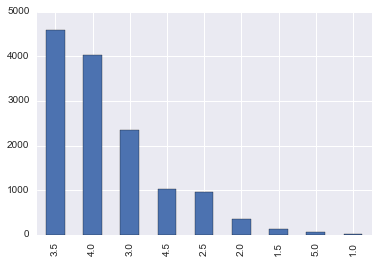

In [87]:
# Exploratory analysis: Let's see how the star ratings are distributed.
dfclean['Star_Rating'].value_counts().plot(kind='bar')

On average, it seems that people feel pretty average about the restaurants they eat at. One would assume that there's not much of a reason to post a review from an overall unremarkable experience, but I would also assume that if I posted my opinions about a restaurant online no one would care, so clearly I don't understand the American populous.

Even if people are posting raving / scathing reviews, the reviews seem to average out to be at least decent.

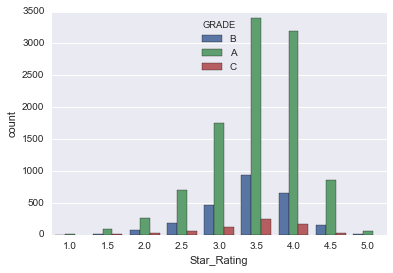

In [151]:
# Let's add DOH grade
sns.countplot(x='Star_Rating', hue='GRADE', data=dfclean)

This chart is not very useful since it just shows that the vast majority of restaurants in our set have A ratings. It is interesting to see that A, B, & C grades seem to be fairly normally distributed. I would have expected C ratings to be skewed heavily to the left.

But this chart does not take into account the number of reviews for each star rating. Let's see if this chart changes once we incorporate review count into the fold...

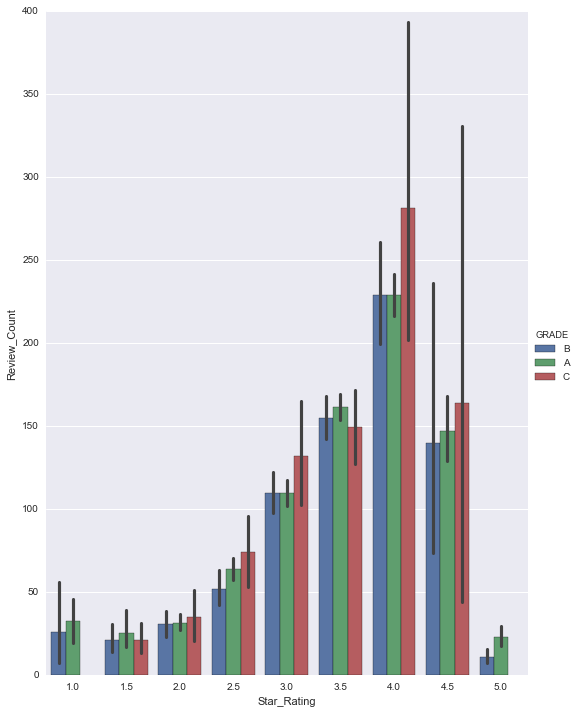

In [112]:
sns.factorplot(x='Star_Rating', y='Review_Count', hue='GRADE', data=dfclean, kind='bar', size=10, aspect=.75)

In [148]:
# Numerical breakdown of Grade / Star Rating distribution
pd.crosstab(dfclean.GRADE, dfclean.Star_Rating)

Star_Rating,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
GRADE,,,,,,,,,
A,13,95,259,709,1759,3399,3199,856,55
B,3,15,71,184,473,935,660,153,8
C,0,12,23,63,121,252,163,27,0


Surprisingly, people seem to love restaurants with poor DOH grades! This isn't too shocking given that the types of businesses that do disproportionately well on Yelp (as compared to other rating services) are "hole in the wall" cheap eats destinations. These restaurants often are dingy on the inside with extremely high volume with very small quarters and often have the same person handling the food and manning the register so there are many risks for contamination.

I am surprised that none of our 1 star average restaurants received a C rating though. My suspicion here is that we would see more if we included entries with fewer than 5 reviews. If the first review on a restaurant's Yelp page is "I loved my croissant until I realized that it was full of rat shit instead of chocolate; 0 stars", it's pretty likely others would steer clear and not bother to rate the restaurant themselves.

But enough speculation, let's see what else the data can tell us...

I'd like to see what the weighted average star rating is for each DOH grade.

In [149]:
# In order to calculate weighted average, I will first split my df by letter grade
# I'll append a column "weightedavg" that follows the logic (star_rating * (review_count/totalreviews))

dfA = dfclean[dfclean.GRADE == 'A']
dfB = dfclean[dfclean.GRADE == 'B']
dfC = dfclean[dfclean.GRADE == 'C']

totalreviewsA = dfA.Review_Count.sum()
dfA['weightedavg'] = dfA['Star_Rating'] * (dfA['Review_Count'] / totalreviewsA)

totalreviewsB = dfB.Review_Count.sum()
dfB['weightedavg'] = dfB['Star_Rating'] * (dfB['Review_Count'] / totalreviewsB)

totalreviewsC = dfC.Review_Count.sum()
dfC['weightedavg'] = dfC['Star_Rating'] * (dfC['Review_Count'] / totalreviewsC)

/Users/jessekranzler/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jessekranzler/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jessekranzler/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [150]:
Aavg = dfA.weightedavg.sum()
Bavg = dfB.weightedavg.sum()
Cavg = dfC.weightedavg.sum()



print "A Average:", Aavg
print "B Average:", Bavg
print "C Average:", Cavg

A Average: 3.70172324601
B Average: 3.65096282133
C Average: 3.61892486266


Although the numbers are very close, we finally see the logic we were expecting with Yelp star rating decreasing as DOH letter grade decreases.

Let's see if any other variables seem to impact DOH grade. Let's look at borough, zip code, and cuisine type.

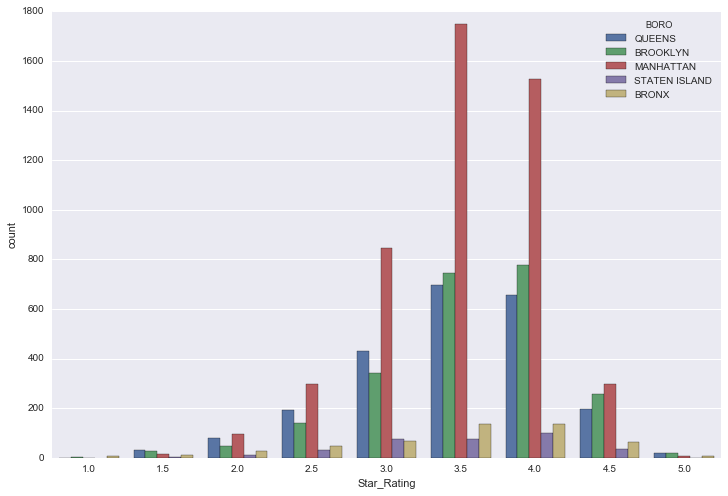

In [170]:
# Distribution of star ratings across boroughs for A-rated restaurants
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.countplot(x='Star_Rating', hue='BORO', data=dfA, ax=ax)

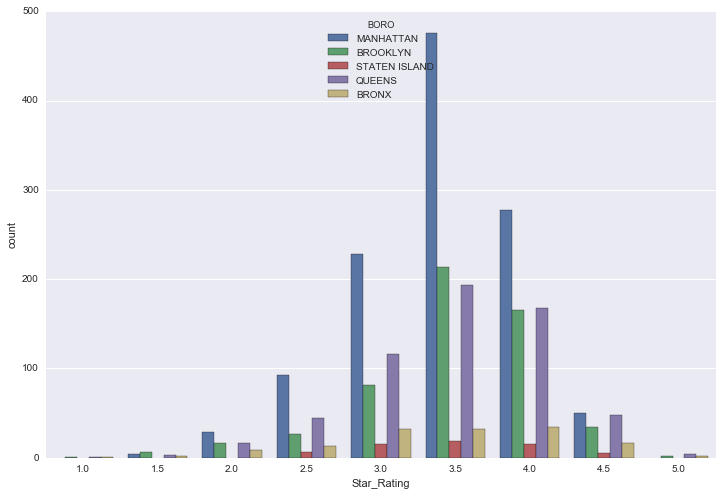

In [169]:
# Distribution of star ratings across boroughs for B-rated restaurants
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.countplot(x='Star_Rating', hue='BORO', data=dfB, ax=ax)

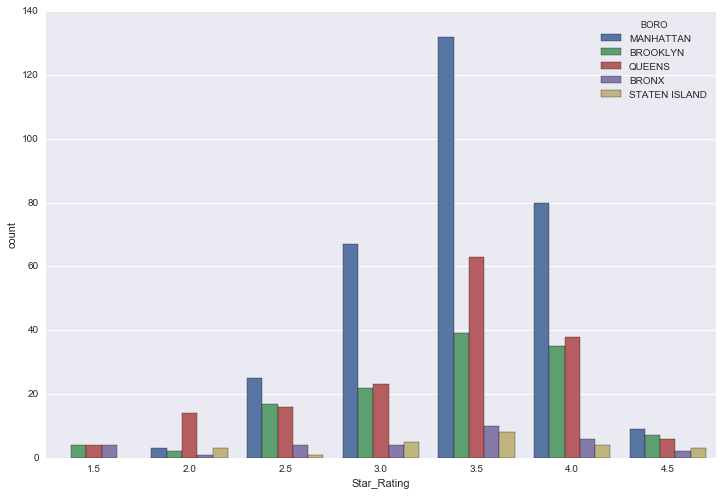

In [168]:
# Distribution of star ratings across boroughs for C-rated restaurants
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.countplot(x='Star_Rating', hue='BORO', data=dfC, ax=ax)



In [173]:
# Let's look how DOH grades are distributed amongst various cuisines

pd.crosstab(dfclean['GRADE'], dfclean['CUISINE DESCRIPTION'])


CUISINE DESCRIPTION,Afghan,African,American,Armenian,Asian,Australian,Bagels/Pretzels,Bakery,Bangladeshi,Barbecue,...,Soups & Sandwiches,Southwestern,Spanish,Steak,Tapas,Tex-Mex,Thai,Turkish,Vegetarian,Vietnamese/Cambodian/Malaysia
GRADE,,,,,,,,,,,,,,,,,,,,,
A,6,11,2680,6,156,12,108,294,10,47,...,29,5,168,58,20,80,176,56,62,34
B,1,10,537,0,55,1,17,70,4,2,...,2,0,58,8,4,13,49,6,11,29
C,0,1,139,0,21,0,8,16,4,1,...,1,0,13,4,0,0,21,1,9,4


In [180]:
# Since some cuisines are disproportionately represented in NYC, let's look at a percentage breakdown
pd.crosstab(dfclean['GRADE'], dfclean['CUISINE DESCRIPTION']).apply(lambda r: r/r.sum(), axis=0)

CUISINE DESCRIPTION,Afghan,African,American,Armenian,Asian,Australian,Bagels/Pretzels,Bakery,Bangladeshi,Barbecue,...,Soups & Sandwiches,Southwestern,Spanish,Steak,Tapas,Tex-Mex,Thai,Turkish,Vegetarian,Vietnamese/Cambodian/Malaysia
GRADE,,,,,,,,,,,,,,,,,,,,,
A,0.857143,0.500000,0.798570,1.0,0.672414,0.923077,0.81203,0.773684,0.555556,0.94,...,0.90625,1.0,0.702929,0.828571,0.833333,0.860215,0.715447,0.888889,0.756098,0.507463
B,0.142857,0.454545,0.160012,0.0,0.237069,0.076923,0.12782,0.184211,0.222222,0.04,...,0.06250,0.0,0.242678,0.114286,0.166667,0.139785,0.199187,0.095238,0.134146,0.432836
C,0.000000,0.045455,0.041418,0.0,0.090517,0.000000,0.06015,0.042105,0.222222,0.02,...,0.03125,0.0,0.054393,0.057143,0.000000,0.000000,0.085366,0.015873,0.109756,0.059701


In [191]:
cuisinedf = pd.crosstab(dfclean['GRADE'], dfclean['CUISINE DESCRIPTION']).apply(lambda r: r/r.sum(), axis=0)

cuisinerotate = cuisinedf.transpose()

cuisinerotate.sort_values(by=['C'],ascending=False)

GRADE,A,B,C
CUISINE DESCRIPTION,,,
Chilean,0.500000,0.000000,0.500000
Bangladeshi,0.555556,0.222222,0.222222
Eastern European,0.730769,0.134615,0.134615
Continental,0.767442,0.116279,0.116279
Pakistani,0.611111,0.277778,0.111111
Vegetarian,0.756098,0.134146,0.109756
Asian,0.672414,0.237069,0.090517
Thai,0.715447,0.199187,0.085366
Indian,0.702222,0.213333,0.084444


Above we see the cuisines with the highest percentage of C ratings. There are a lot of surprises in here. It just goes to show that stereotypes are not always true. Maybe someone should show this report to Donald Trump?

Let's do a similar exercise for NYC zipcodes. I'd like to find the highest density of C-rated restaurants. One would assume they would be centered around Chinatown and Flushing, but the data has disproven my stereotypes multiple times already, so we'll see how the results pan out...

In [194]:
pd.crosstab(dfclean['GRADE'], dfclean['ZIPCODE']).apply(lambda r: r/r.sum(), axis=0)


ZIPCODE,10001,10002,10003,10004,10005,10006,10007,10009,10010,10011,...,11432,11433,11434,11435,11436,11691,11692,11693,11694,11697
GRADE,,,,,,,,,,,,,,,,,,,,,
A,0.796992,0.768025,0.748936,0.744444,0.794118,0.71875,0.910714,0.748744,0.726708,0.797251,...,0.774194,0.8,1.0,0.78,0.5,0.466667,0.833333,0.588235,0.85,1.0
B,0.172932,0.200627,0.182979,0.200000,0.176471,0.25000,0.089286,0.195980,0.204969,0.154639,...,0.193548,0.2,0.0,0.10,0.5,0.466667,0.166667,0.117647,0.15,0.0
C,0.030075,0.031348,0.068085,0.055556,0.029412,0.03125,0.000000,0.055276,0.068323,0.048110,...,0.032258,0.0,0.0,0.12,0.0,0.066667,0.000000,0.294118,0.00,0.0


In [195]:
zipdf = pd.crosstab(dfclean['GRADE'], dfclean['ZIPCODE']).apply(lambda r: r/r.sum(), axis=0)

ziprotate = zipdf.transpose()

ziprotate.sort_values(by=['C'],ascending=False)

GRADE,A,B,C
ZIPCODE,,,
11242,0.666667,0.000000,0.333333
10037,0.375000,0.312500,0.312500
11693,0.588235,0.117647,0.294118
11203,0.548387,0.225806,0.225806
10034,0.750000,0.041667,0.208333
10474,0.600000,0.200000,0.200000
10104,0.800000,0.000000,0.200000
11236,0.555556,0.259259,0.185185
11228,0.710526,0.105263,0.184211


...and the winners are *drumroll*

Rank | Zipcode | Neighborhood, BORO | % C Restaurants
---| ---| --- | ---
1 | 11242 | Brooklyn Heights, BK | .333
2 | 10037 | East Harlem, MAN | .313
3 | 11693 | Far Rockaway, QNS | .294
4 | 11203 | East Flatbush, BK |	.225
5 | 10034 | Inwood, MAN | .208
6 | 10474 | Hunts Point, BX | .200
7 | 10104 | 51st-52nd St btw 5th & 6th Ave, MAN | .200
8 | 11236 | Canarsie, BK | .185
9 | 11228 | Dyker Heights, BK | .184
10| 10308 | Great Kills, SI | .176

All 5 boroughs are on our top ten list. Conclusion? Nowhere is safe.

I think we've done enough exploratory analysis, don't you? Let's get started on modeling our dataset. We have to manipulate our dataframe one more time to get it ready for modeling.

There are multiple categorical columns in our dataset. We need to decide if we want to use them or lose them

- DBA: Lose it; restaurant name is irrelevant to us
- BORO: Use it; we'll dummy encode them
- CUISINE DESCRIPTION: Use it; although there are an insane number of cuisines, they do tell a story. We'll dummy encode
- GRADE: Use it; this is going to be our target variable
- CRITICAL FLAG: Lose it; despite what the name might suggest, this is not critical to our study

Additional columns to drop:
- ZIPCODE: Too much data here, I'd rather focus on borough than on each individual zip.
- PHONE NUMBER: Was crucial in putting together our dataset, but doesn't serve any purpose now.
- INSPECTION DATE: For this purpose, we are not interested in grades over time so all time series data can be removed.
- GRADE DATE: (see above)
- REVIEW COUNT: Since we removed all entries with fewer than 5 entries, we can consider each star rating to be significant. The review count is not necessary moving forward
- SCORE: Although this is just a continuous version of our target variable, we'll drop it for the time being

In [209]:
cuisine = pd.get_dummies(dfclean["CUISINE DESCRIPTION"])
cuisine.columns = ['cuisine_' + str(i) for i in cuisine.columns]

grade = pd.get_dummies(dfclean["GRADE"])

boro = pd.get_dummies(dfclean["BORO"])

df = pd.concat([dfclean,cuisine, boro, grade], axis=1)

df.columns

Index([u'DBA', u'BORO', u'ZIPCODE', u'PHONE', u'CUISINE DESCRIPTION',
       u'INSPECTION DATE', u'CRITICAL FLAG', u'SCORE', u'GRADE', u'GRADE DATE',
       ...
       u'cuisine_Vegetarian', u'cuisine_Vietnamese/Cambodian/Malaysia',
       u'BRONX', u'BROOKLYN', u'MANHATTAN', u'QUEENS', u'STATEN ISLAND', u'A',
       u'B', u'C'],
      dtype='object', length=102)

In [213]:
cols_to_drop = [
    'BORO', 
    'CUISINE DESCRIPTION', 
    'ZIPCODE', 
    'PHONE', 
    'DBA', 
    'INSPECTION DATE', 
    'CRITICAL FLAG', 
    'GRADE', 
    'GRADE DATE', 
    'Review_Count', 
    'cuisine_Not Listed/Not Applicable', 
    'STATEN ISLAND',
    'SCORE',
    'A',
    'B',
    'C'
    
]

X = df.drop(cols_to_drop, axis=1)
y = df['GRADE']

# We've only kept these columns
print "COLUMNS: " + " ".join(X.columns.values)

# We dropped 'Staten Island' & 'Not Listed / Not Applicable' because we always drop one of our dummies.
# We dropped 'Score' because it is our target variable, it shouldn't be in our X.
X.columns.values

COLUMNS: Star_Rating cuisine_Afghan cuisine_African cuisine_American cuisine_Armenian cuisine_Asian cuisine_Australian cuisine_Bagels/Pretzels cuisine_Bakery cuisine_Bangladeshi cuisine_Barbecue cuisine_Bottled beverages, including water, sodas, juices, etc. cuisine_Brazilian cuisine_Caf_/Coffee/Tea cuisine_Cajun cuisine_Californian cuisine_Caribbean cuisine_Chicken cuisine_Chilean cuisine_Chinese cuisine_Chinese/Cuban cuisine_Chinese/Japanese cuisine_Continental cuisine_Creole cuisine_Creole/Cajun cuisine_Czech cuisine_Delicatessen cuisine_Donuts cuisine_Eastern European cuisine_Egyptian cuisine_English cuisine_Ethiopian cuisine_Filipino cuisine_French cuisine_Fruits/Vegetables cuisine_German cuisine_Greek cuisine_Hamburgers cuisine_Hotdogs cuisine_Hotdogs/Pretzels cuisine_Ice Cream, Gelato, Yogurt, Ices cuisine_Indian cuisine_Indonesian cuisine_Irish cuisine_Italian cuisine_Japanese cuisine_Jewish/Kosher cuisine_Juice, Smoothies, Fruit Salads cuisine_Korean cuisine_Latin (Cuban, Domi

array(['Star_Rating', 'cuisine_Afghan', 'cuisine_African',
       'cuisine_American', 'cuisine_Armenian', 'cuisine_Asian',
       'cuisine_Australian', 'cuisine_Bagels/Pretzels', 'cuisine_Bakery',
       'cuisine_Bangladeshi', 'cuisine_Barbecue',
       'cuisine_Bottled beverages, including water, sodas, juices, etc.',
       'cuisine_Brazilian', 'cuisine_Caf_/Coffee/Tea', 'cuisine_Cajun',
       'cuisine_Californian', 'cuisine_Caribbean', 'cuisine_Chicken',
       'cuisine_Chilean', 'cuisine_Chinese', 'cuisine_Chinese/Cuban',
       'cuisine_Chinese/Japanese', 'cuisine_Continental', 'cuisine_Creole',
       'cuisine_Creole/Cajun', 'cuisine_Czech', 'cuisine_Delicatessen',
       'cuisine_Donuts', 'cuisine_Eastern European', 'cuisine_Egyptian',
       'cuisine_English', 'cuisine_Ethiopian', 'cuisine_Filipino',
       'cuisine_French', 'cuisine_Fruits/Vegetables', 'cuisine_German',
       'cuisine_Greek', 'cuisine_Hamburgers', 'cuisine_Hotdogs',
       'cuisine_Hotdogs/Pretzels',
       

In [214]:
from sklearn.cross_validation import train_test_split
from sklearn import feature_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

train = pd.DataFrame(data=X_train, columns=['Star_Rating', 'cuisine_Afghan', 'cuisine_African',
       'cuisine_American', 'cuisine_Armenian', 'cuisine_Asian',
       'cuisine_Australian', 'cuisine_Bagels/Pretzels', 'cuisine_Bakery',
       'cuisine_Bangladeshi', 'cuisine_Barbecue',
       'cuisine_Bottled beverages, including water, sodas, juices, etc.',
       'cuisine_Brazilian', 'cuisine_Caf_/Coffee/Tea', 'cuisine_Cajun',
       'cuisine_Californian', 'cuisine_Caribbean', 'cuisine_Chicken',
       'cuisine_Chilean', 'cuisine_Chinese', 'cuisine_Chinese/Cuban',
       'cuisine_Chinese/Japanese', 'cuisine_Continental', 'cuisine_Creole',
       'cuisine_Creole/Cajun', 'cuisine_Czech', 'cuisine_Delicatessen',
       'cuisine_Donuts', 'cuisine_Eastern European', 'cuisine_Egyptian',
       'cuisine_English', 'cuisine_Ethiopian', 'cuisine_Filipino',
       'cuisine_French', 'cuisine_Fruits/Vegetables', 'cuisine_German',
       'cuisine_Greek', 'cuisine_Hamburgers', 'cuisine_Hotdogs',
       'cuisine_Hotdogs/Pretzels',
       'cuisine_Ice Cream, Gelato, Yogurt, Ices', 'cuisine_Indian',
       'cuisine_Indonesian', 'cuisine_Irish', 'cuisine_Italian',
       'cuisine_Japanese', 'cuisine_Jewish/Kosher',
       'cuisine_Juice, Smoothies, Fruit Salads', 'cuisine_Korean',
       'cuisine_Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
       'cuisine_Mediterranean', 'cuisine_Mexican',
       'cuisine_Middle Eastern', 'cuisine_Moroccan',
       'cuisine_Nuts/Confectionary', 'cuisine_Other', 'cuisine_Pakistani',
       'cuisine_Pancakes/Waffles', 'cuisine_Peruvian', 'cuisine_Pizza',
       'cuisine_Pizza/Italian', 'cuisine_Polish', 'cuisine_Polynesian',
       'cuisine_Portuguese', 'cuisine_Russian', 'cuisine_Salads',
       'cuisine_Sandwiches', 'cuisine_Sandwiches/Salads/Mixed Buffet',
       'cuisine_Scandinavian', 'cuisine_Seafood', 'cuisine_Soul Food',
       'cuisine_Soups', 'cuisine_Soups & Sandwiches',
       'cuisine_Southwestern', 'cuisine_Spanish', 'cuisine_Steak',
       'cuisine_Tapas', 'cuisine_Tex-Mex', 'cuisine_Thai',
       'cuisine_Turkish', 'cuisine_Vegetarian',
       'cuisine_Vietnamese/Cambodian/Malaysia', 'BRONX', 'BROOKLYN',
       'MANHATTAN', 'QUEENS'])
train['GRADE'] = y_train

test = pd.DataFrame(data=X_test, columns=['Star_Rating', 'cuisine_Afghan', 'cuisine_African',
       'cuisine_American', 'cuisine_Armenian', 'cuisine_Asian',
       'cuisine_Australian', 'cuisine_Bagels/Pretzels', 'cuisine_Bakery',
       'cuisine_Bangladeshi', 'cuisine_Barbecue',
       'cuisine_Bottled beverages, including water, sodas, juices, etc.',
       'cuisine_Brazilian', 'cuisine_Caf_/Coffee/Tea', 'cuisine_Cajun',
       'cuisine_Californian', 'cuisine_Caribbean', 'cuisine_Chicken',
       'cuisine_Chilean', 'cuisine_Chinese', 'cuisine_Chinese/Cuban',
       'cuisine_Chinese/Japanese', 'cuisine_Continental', 'cuisine_Creole',
       'cuisine_Creole/Cajun', 'cuisine_Czech', 'cuisine_Delicatessen',
       'cuisine_Donuts', 'cuisine_Eastern European', 'cuisine_Egyptian',
       'cuisine_English', 'cuisine_Ethiopian', 'cuisine_Filipino',
       'cuisine_French', 'cuisine_Fruits/Vegetables', 'cuisine_German',
       'cuisine_Greek', 'cuisine_Hamburgers', 'cuisine_Hotdogs',
       'cuisine_Hotdogs/Pretzels',
       'cuisine_Ice Cream, Gelato, Yogurt, Ices', 'cuisine_Indian',
       'cuisine_Indonesian', 'cuisine_Irish', 'cuisine_Italian',
       'cuisine_Japanese', 'cuisine_Jewish/Kosher',
       'cuisine_Juice, Smoothies, Fruit Salads', 'cuisine_Korean',
       'cuisine_Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
       'cuisine_Mediterranean', 'cuisine_Mexican',
       'cuisine_Middle Eastern', 'cuisine_Moroccan',
       'cuisine_Nuts/Confectionary', 'cuisine_Other', 'cuisine_Pakistani',
       'cuisine_Pancakes/Waffles', 'cuisine_Peruvian', 'cuisine_Pizza',
       'cuisine_Pizza/Italian', 'cuisine_Polish', 'cuisine_Polynesian',
       'cuisine_Portuguese', 'cuisine_Russian', 'cuisine_Salads',
       'cuisine_Sandwiches', 'cuisine_Sandwiches/Salads/Mixed Buffet',
       'cuisine_Scandinavian', 'cuisine_Seafood', 'cuisine_Soul Food',
       'cuisine_Soups', 'cuisine_Soups & Sandwiches',
       'cuisine_Southwestern', 'cuisine_Spanish', 'cuisine_Steak',
       'cuisine_Tapas', 'cuisine_Tex-Mex', 'cuisine_Thai',
       'cuisine_Turkish', 'cuisine_Vegetarian',
       'cuisine_Vietnamese/Cambodian/Malaysia', 'BRONX', 'BROOKLYN',
       'MANHATTAN', 'QUEENS'])
test['GRADE'] = y_test

Since my target variable is not binary (A, B, or C), I will first try to model this dataset using basic classification techniques. First I will try KNN (and apply grid search to find the best value of K), then I will try my luck with decision trees and random forests.

If I'm feeling spicy, I can turn this into three different logisitic regressions using my dummy encoded grade columns (is A? is B? or is C?), but hopefully it doesn't come to that.

In [226]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

knnmodel = KNeighborsClassifier(n_neighbors=50)
print "Mean Score", cross_val_score(knnmodel, X, y, scoring='accuracy').mean()

Mean Score 0.765825136106


In [217]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# We'll try finding the best value of k, and weights by trying all possible pairs
parameter_grid = [
  {'n_neighbors': range(3, 70), 'weights': ['uniform', 'distance']}
 ]

clf = GridSearchCV(KNeighborsClassifier(), parameter_grid, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69], 'weights': ['uniform', 'distance']}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [218]:
print
print "GRID SEARCH RESULTS:"
print "\tBest Parameters", clf.best_params_
print "\tBest Score", clf.best_score_

# A list of all scores are stored in clf.grid_scores_
pd.DataFrame(clf.grid_scores_).drop('cv_validation_scores', axis=1).head()


GRID SEARCH RESULTS:
	Best Parameters {'n_neighbors': 52, 'weights': 'uniform'}
	Best Score 0.76972709964


,parameters,mean_validation_score
0,"{u'n_neighbors': 3, u'weights': u'uniform'}",0.718426
1,"{u'n_neighbors': 3, u'weights': u'distance'}",0.716628
2,"{u'n_neighbors': 4, u'weights': u'uniform'}",0.742754
3,"{u'n_neighbors': 4, u'weights': u'distance'}",0.738841
4,"{u'n_neighbors': 5, u'weights': u'uniform'}",0.736937


It looks like our first attempt at KNN (.7658) was pretty damn close to the optimal result (.7697.) I should probably chalk this up to luck considering my choice of K value was random, but just let me feel good about myself and let me think this was all skill, OK? 

In [225]:
knnmodel = KNeighborsClassifier(n_neighbors=52, weights='uniform')
print "Mean Score", cross_val_score(knnmodel, X, y, scoring='accuracy').mean()

Mean Score 0.765825136106


I'm not sure why my mean score did not change after I updated the neighbors and weights from the grid search. But, since my original result was so close to the optimal one, I'll just move on to another modeling technique.

Next up: Decision Tree

In [227]:
dcmodel = DecisionTreeClassifier()
dcmodel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [228]:
ypredict = dcmodel.predict(X_test)

In [229]:
from sklearn import metrics

metrics.accuracy_score(y_test, ypredict)

0.74488033555391064

In [230]:
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [231]:
rfpredict = rfmodel.predict(X_test)

metrics.accuracy_score(y_test, rfpredict)

0.74043918085368865

For those of you following along at home now, here's how our accuracy scores stack up:

Model | Accuracy Score
--- | ---
KNN | 0.765825136106
Decision Tree | 0.74488033555391064
Random Forest | 0.74043918085368865

Next up, we will try our luck with logistic regression.

In [234]:
# We'll need to create dummies for y

y_train2 = pd.get_dummies(y_train,prefix='is')
y_test2 = pd.get_dummies(y_test,prefix='is')

y_train2.columns

Index([u'is_A', u'is_B', u'is_C'], dtype='object')

In [235]:
lrmodel = LogisticRegression()
lrmodel.fit(X_train, y_train2.is_A)

lrpredictA = lrmodel.predict(X_test)
metrics.accuracy_score(y_test2.is_A, lrpredictA)

0.75548976067110785

In [236]:
lrmodel.fit(X_train, y_train2.is_B)

lrpredictB = lrmodel.predict(X_test)
metrics.accuracy_score(y_test2.is_B, lrpredictB)

0.80804342462373546

In [237]:
lrmodel.fit(X_train, y_train2.is_C)

lrpredictC = lrmodel.predict(X_test)
metrics.accuracy_score(y_test2.is_C, lrpredictC)

0.94843325931408828

In [239]:
total_correct=(lrpredictA.sum()+lrpredictB.sum()+lrpredictC.sum())
print total_correct

4035.0


In [240]:
total_predict = (y_test2.is_A.sum()+y_test2.is_B.sum()+y_test2.is_C.sum())

print total_predict


4053.0


In [241]:
total_correct/total_predict

0.99555884529977789

We can see with this insanely high accuracy score for logistic regression, we probably overfitted.

We can validate this by testing our model on our train and test sets separately. We'd assume that it will perform very well on our train set, but very poorly on our test set.

We could get around this by doing a more robust train split, by employing K-fold cross validation.

There are a few fairly simple ways we could improve our score:
- Increase the size of the data set: We only used about 20% of the dataset
- Replace NaN values instead of dropping them: We could have filled NaN values in with column averages or done additional research to fill additional values in by hand (for example, we could replace the "Missing" boroughs by searching for addresses and zipcodes)
- Feature selection: We could choose different combinations of predictors to focus on.


Obviously a lot more goes into restaurant cleanliness than the features I've described here. There are ways we could have made our dataset more robust and been more representative of the real world:
- Additional Yelp data: The dollar rating from Yelp could be a very useful score. We'd expect "three dollar sign" restaurants to be fine dining "fancy" restaurants that *should* have higher cleanliness standards
- Additional geographic data: We could research external issues that prevent a restaurant from passing health checks (a subway running under the restaurant, proximity to a waste facility, etc)
- Owner / proprietor: It's likely that restaurants in the same restaurant group / chain will have similar codes of cleanliness so we should expect grades to be fairly consistent (see examples below)
- Social factors: If employees are treated well they are more likely to care about their place of employment and put their best efforts towards keeping it clean.
- Hype / press: Restaurants that are often in the public spot light might be looked on with additional scrutiny. 
- Etc.: Like any real world dataset, there are infinite numbers of datapoints that could be added. I think we have shown that Yelp star ratings and DOH restaurant grades are not as highly correlated as one might have thought, but I'm sure there are other factors that would be better predictors.



In [282]:
dfMcD = df[df.DBA == "MCDONALD'S"]

dfMcD.SCORE.describe()


count    116.000000
mean      12.043103
std        6.652090
min        2.000000
25%        8.000000
50%       11.000000
75%       12.000000
max       40.000000
Name: SCORE, dtype: float64

In [317]:
dfDOM = df[df.DBA == "DOMINO'S"]

dfDOM.SCORE.describe()

count    60.000000
mean     15.516667
std      11.050718
min       2.000000
25%       9.000000
50%      12.000000
75%      18.500000
max      53.000000
Name: SCORE, dtype: float64

In [288]:
dfSB = df[df.DBA == "STARBUCKS"]

dfSB.SCORE.describe()

count    135.000000
mean       7.518519
std        4.084649
min        2.000000
25%        4.000000
50%        8.000000
75%       11.000000
max       27.000000
Name: SCORE, dtype: float64

In [316]:
dfDD = df[(df.DBA == "DUNKIN' DONUTS") | (df.DBA == "DUNKIN' DONUTS, BASKIN ROBBINS")]


dfDD.SCORE.describe()

count    130.000000
mean       9.446154
std        4.003993
min        2.000000
25%        7.000000
50%        9.500000
75%       12.000000
max       27.000000
Name: SCORE, dtype: float64

In [293]:
dfSW = df[df.DBA == "SUBWAY"]

dfSW.SCORE.describe()

count    55.000000
mean     10.490909
std       5.573990
min       2.000000
25%       7.000000
50%      10.000000
75%      12.500000
max      32.000000
Name: SCORE, dtype: float64

In [318]:
dfBK = df[df.DBA == "BURGER KING"]

dfBK.SCORE.describe()

count    35.000000
mean     10.457143
std       5.031330
min       2.000000
25%       7.000000
50%      10.000000
75%      12.500000
max      27.000000
Name: SCORE, dtype: float64

In [319]:
dfPop = df[df.DBA == "POPEYES LOUISIANA KITCHEN"]

dfPop.SCORE.describe()

count    35.000000
mean     11.542857
std       6.572415
min       2.000000
25%       8.000000
50%      11.000000
75%      12.000000
max      33.000000
Name: SCORE, dtype: float64

In [321]:
dfCMG = df[df.DBA == "CHIPOTLE MEXICAN GRILL"]

dfCMG.SCORE.describe()

count    63.000000
mean     10.746032
std       5.778068
min       2.000000
25%       7.000000
50%      10.000000
75%      12.000000
max      34.000000
Name: SCORE, dtype: float64

In [324]:
dfGK = df[df.DBA == "GOLDEN KRUST CARIBBEAN BAKERY & GRILL"]

dfGK.SCORE.describe()

count    22.000000
mean     12.318182
std       4.684182
min       4.000000
25%      10.000000
50%      11.500000
75%      13.000000
max      24.000000
Name: SCORE, dtype: float64

In [325]:
dfW = df[df.DBA == "WENDY'S"]

dfW.SCORE.describe()

count    29.000000
mean     11.034483
std       2.896830
min       3.000000
25%      10.000000
50%      12.000000
75%      12.000000
max      19.000000
Name: SCORE, dtype: float64

In [332]:
dfchain = pd.concat([
        dfW.SCORE.describe(),
        dfGK.SCORE.describe(),
        dfCMG.SCORE.describe(),
        dfPop.SCORE.describe(),
        dfBK.SCORE.describe(),
        dfSW.SCORE.describe(),
        dfDD.SCORE.describe(),
        dfSB.SCORE.describe(),
        dfDOM.SCORE.describe(),
        dfMcD.SCORE.describe()    
    ], axis =1)

In [336]:
dfchain.columns = [
    "WENDY'S",
    "GOLDEN KRUST",
    "CHIPOTLE",
    "POPEYES",
    "BURGER KING",
    "SUBWAY",
    "DUNKIN' DONUTS",
    "STARBUCKS",
    "DOMINO'S",
    "MCDONALD'S"
]

dfchain.transpose()




,count,mean,std,min,25%,50%,75%,max
WENDY'S,29.0,11.034483,2.896830,3.0,10.0,12.0,12.0,19.0
GOLDEN KRUST,22.0,12.318182,4.684182,4.0,10.0,11.5,13.0,24.0
CHIPOTLE,63.0,10.746032,5.778068,2.0,7.0,10.0,12.0,34.0
POPEYES,35.0,11.542857,6.572415,2.0,8.0,11.0,12.0,33.0
BURGER KING,35.0,10.457143,5.031330,2.0,7.0,10.0,12.5,27.0
SUBWAY,55.0,10.490909,5.573990,2.0,7.0,10.0,12.5,32.0
DUNKIN' DONUTS,130.0,9.446154,4.003993,2.0,7.0,9.5,12.0,27.0
STARBUCKS,135.0,7.518519,4.084649,2.0,4.0,8.0,11.0,27.0
DOMINO'S,60.0,15.516667,11.050718,2.0,9.0,12.0,18.5,53.0
MCDONALD'S,116.0,12.043103,6.652090,2.0,8.0,11.0,12.0,40.0


The above chart breaks down statistics about the 10 largest chains in my dataset. 

*Note: The "Dunkin' Donuts" row contains entries for both "Dunkin' Donuts" & "Dunkin' Donuts / Baskin Robbins"*

Only one chain has a mean rating below an A (Domino's has a mean rating of B.)

Domino's also has the largest standard deviation of scores and wins the title of the chain restaurant with the highest score (53 points; keep in mind you just need 28 to get a C rating.)

McDonald's, Subway, Popeyes, and Chipotle share Domino's honor of having at least one C-rated location.



Additional modeling techniques:
- Linear Regression: Since our "Score" column is just a continuous version of our "Grade" ( A < 14 , B = range(14,28), C >= 28), we could perform Linear Regression with Score as our target variable. 




In [265]:
X = df.drop(cols_to_drop, axis=1)
y = df['SCORE']

from sklearn import feature_selection, linear_model, metrics



linearmodel = linear_model.LinearRegression()
linearmodel.fit(X, y)
f, pvals = feature_selection.f_regression(X, y)


residuals = (y - linearmodel.predict(X)).values

print 'P values:', pvals
print 'Coefficients:', linearmodel.coef_
print 'y-intercept:', linearmodel.intercept_
print 'R-squared:', linearmodel.score(X,y)


P values: [  7.95559947e-12   5.86166301e-01   5.06577405e-02   9.01970007e-05
   1.88817754e-01   1.13154672e-04   3.87373871e-01   6.15812709e-01
   1.20428325e-01   9.16500384e-03   6.69283780e-02   3.76767016e-02
   4.78295087e-01   1.28550046e-17   6.35503354e-01   5.06086495e-01
   4.01488549e-01   3.29469682e-01   4.89155346e-02   1.39178213e-24
   8.56857832e-01   6.35047772e-02   7.92927814e-01   8.42466633e-01
   4.27469401e-01   2.38280145e-01   1.88583849e-02   2.46466710e-07
   2.75090464e-01   2.20585049e-01   2.46436655e-01   3.04408470e-01
   7.17849880e-02   3.72058733e-02   6.06975407e-01   8.42543325e-01
   2.39913246e-01   1.03617464e-02   7.14201374e-01   2.53444763e-01
   2.16970065e-06   2.43476171e-02   5.62587178e-01   7.51517899e-02
   3.33634218e-02   1.30198488e-04   5.18824640e-01   3.06657609e-03
   4.26902296e-08   4.81536415e-05   5.01717565e-02   1.08993187e-03
   4.12795709e-02   4.59653604e-01   6.06975407e-01   1.30271700e-01
   2.49740220e-02   7.14

My linear regression model results are awful. It's likely that I am overfitting here too.